## Preamble

In [2]:
# Load libraries and set plot parameters
import numpy as np
import pandas as pd
import json
import pytz

import datetime
datetime.datetime(1990, 1, 1, tzinfo=pytz.utc)

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 15
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

In [3]:
# Functions to load data
def readfile(fin):
    ''' Generic JSON reader, defaults to calling the file that getdata() outputs
    '''
    with open(fin) as f:
        vals = json.load(f)
    return vals

def getgraphinmem():
    '''Helper that reads our netdict file (the data translated into a useful dictionary thingie.)
    '''
    netdict = readfile("/Users/quinnbatten/Documents/Programming/PyProjects/rborrow/textfiles/netdict1.json")
    return netdict

netdict = getgraphinmem()

In [4]:
# Put into dataframe, do a bit of cleanup
df_tmp = []

for loan in netdict:
    tmp_loan = {'amt':'', 'bor':'','date':'','lend':''}
    if loan['amt'].isdigit():
        tmp_loan['amt'] = int(loan['amt'])
    else:
        tmp_loan['amt'] = 'NaN'
    tmp_loan['bor'] = loan['bor']
    tmp_loan['lend'] = loan['lend']
    tmp_loan['date'] = loan['date']
    tmp_loan['date_h'] = datetime.datetime.utcfromtimestamp(loan['date']).strftime('%Y-%m-%d %H:%M:%S')
    df_tmp.append(tmp_loan)
    
df = pd.DataFrame(df_tmp)
df.replace('NaN', np.nan, inplace=True)
df = df[df.amt != 0]
df = df[~df.amt.isnull()]

In [5]:
# Setting a datetime index
df['date'] = pd.to_datetime(df['date_h'])
del df['date_h']
df.set_index('date', inplace=True)
df.head()

,amt,bor,lend
date,,,
2018-08-28 13:22:25,40.0,bannon031,thefirm17982
2018-08-28 00:46:36,775.0,akavinceblack,kashifr
2018-08-27 19:24:47,220.0,siemprebread,flagsfly
2018-08-27 19:07:47,400.0,thevomitgirl,WexleySnoops
2018-08-27 18:19:43,100.0,jriver76,Justaddwater01


## Let's make some graphs!

First, let's graph the total amount of principal moved through the platform each month.

In [6]:
# Making a new aggregated dataframe: sum of loans repaid each month
df_m = df.copy()
del df_m['bor']
del df_m['lend']
df_m.resample('M').sum()
df_m.head()

,amt
date,
2018-08-28 13:22:25,40.0
2018-08-28 00:46:36,775.0
2018-08-27 19:24:47,220.0
2018-08-27 19:07:47,400.0
2018-08-27 18:19:43,100.0


Text(0.5,1,'Total loan amount repaid, by month, for all users')

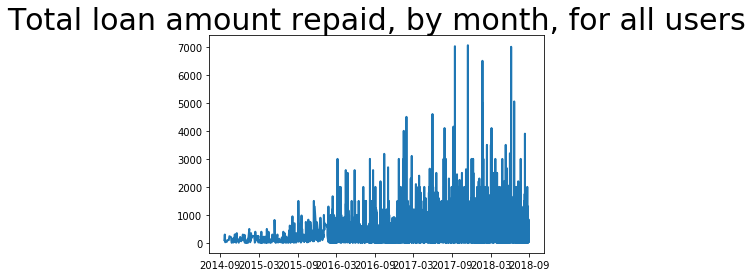

In [7]:
plt.plot(df_m.index, df_m['amt'])
plt.title("Total loan amount repaid, by month, for all users", size=30)

In [ ]:
plt.hist(df['amt'], bins = 40)
plt.title("Loan amount, by loan", size = 30)

In [ ]:
amt = df['amt']
plt.hist(amt[amt < 1000], bins = 100)
plt.title("Loan amount, by loan, for loans <$1000", size = 30)

In [ ]:
tmp2 = df.aggregate(np.sum)
tmp2

### Let's look at our lenders...

In [ ]:
df_lendgroup = df.groupby('lend')

lsum = df_lendgroup.aggregate(np.sum)['amt']
lcount = df_lendgroup.agg(pd.Series.nunique)['amt']
lcount.describe()

In [ ]:
lsum.describe()

In [ ]:
plt.hist(lcount[lcount<20], bins = 20)
plt.title("Number of lifetime loans, by lender, for those <20", size = 30)

In [ ]:
lcount

In [ ]:
plt.hist(lsum[(lsum < 1000) & (lsum > 0)], bins = 40)
plt.title("Sum of lifetime loans, per lender, for those <$1000", size = 30)

In [ ]:
plt.hist(lsum[lsum > 8000], bins = 40)
plt.title("Sum of lifetime loans, per lender, for those >$8000", size = 30)

####There are 11 people who have lent over $50,000 each

###The largest loan given on the sub was $7000, the lender earned back $10,000

https://www.reddit.com/r/borrow/comments/8p0cgz/paid_umusic_tech_7000_on_time/

(Request: https://www.reddit.com/r/borrow/comments/7qqf7z/req_7000_columbia_md_usa_10010_by_060818_paypal/)

In [ ]:
group_bor = df.groupby('bor')

bsum = group_bor.aggregate(np.sum)
bcount = group_bor.agg(pd.Series.nunique)

In [ ]:
bsum.describe()

In [ ]:
bcount.describe()

In [ ]:
bfindbig = group_bor[['bor','amt']].aggregate(np.sum)
bfindbig[bfindbig['amt']>1000].sort_values(['amt'])

In [ ]:
lfindbig = df_lendgroup[['bor','amt']].aggregate(np.sum)
lfindbig[lfindbig['amt']>100000].sort_values(['amt'])